In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


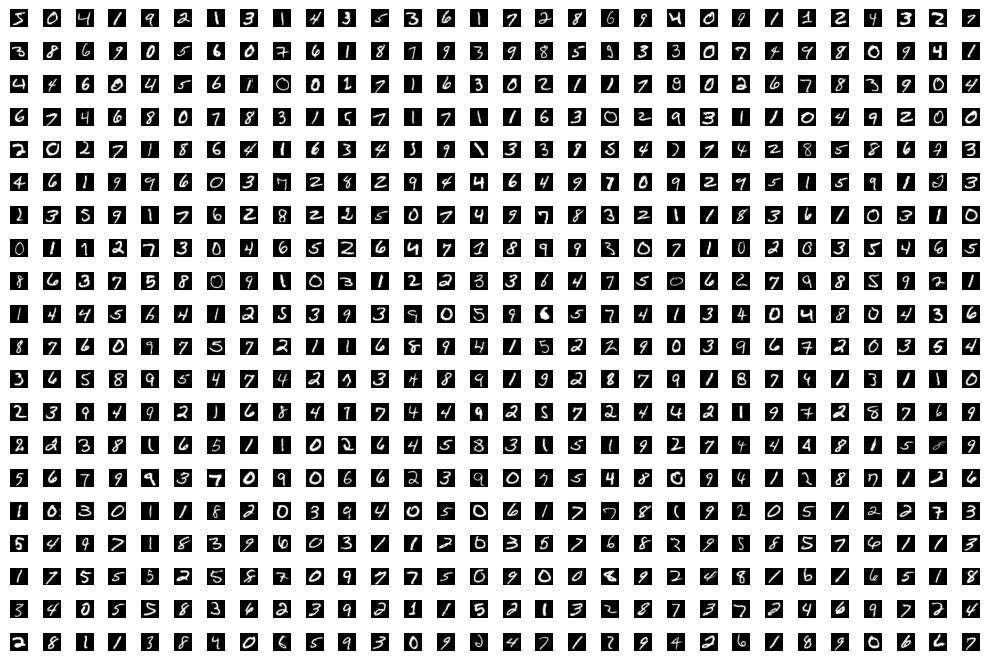

In [68]:
# Visualize 25 random images
plt.figure(figsize=(10, 10))
for i in range(600):
    plt.subplot(30, 30, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

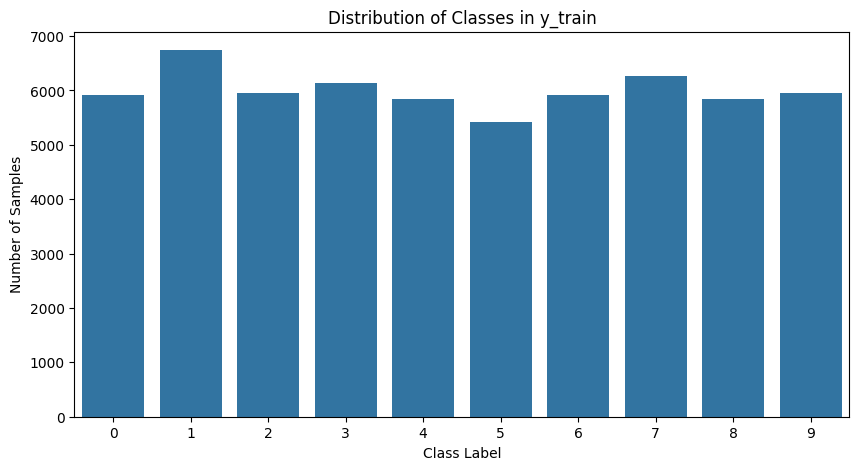

In [5]:
# Count the number of occurrences of each class in y_train
class_counts = np.argmax(y_train, axis=1)
unique_classes, counts = np.unique(class_counts, return_counts=True)

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=unique_classes, y=counts)
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()

In [6]:
# Define the neural network model
def create_nn_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

In [7]:

# Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

In [8]:

# Compile and train the neural network model
nn_model = create_nn_model()
nn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
nn_history = nn_model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=128, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7531 - loss: 0.8158 - val_accuracy: 0.9558 - val_loss: 0.1481
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9334 - loss: 0.2293 - val_accuracy: 0.9678 - val_loss: 0.1085
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1591 - val_accuracy: 0.9733 - val_loss: 0.0882
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.1337 - val_accuracy: 0.9750 - val_loss: 0.0831
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9663 - loss: 0.1131 - val_accuracy: 0.9783 - val_loss: 0.0726
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9681 - loss: 0.1011 - val_accuracy: 0.9772 - val_loss: 0.0701
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0870 - val_accuracy: 0.9773 - val_loss: 0.0718
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0821 - val_accuracy: 0.

In [9]:

# Compile and train the CNN model
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=128, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7238 - loss: 0.8351 - val_accuracy: 0.9778 - val_loss: 0.0697
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9572 - loss: 0.1485 - val_accuracy: 0.9855 - val_loss: 0.0451
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9731 - loss: 0.0948 - val_accuracy: 0.9890 - val_loss: 0.0357
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9775 - loss: 0.0770 - val_accuracy: 0.9903 - val_loss: 0.0400
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9823 - loss: 0.0646 - val_accuracy: 0.9918 - val_loss: 0.0308
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9854 - loss: 0.0523 - val_accuracy: 0.9892 - val_loss: 0.0356
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0473 - val_accuracy: 0.9905 - val_loss: 0.0333
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0387 - val_accuracy: 

In [10]:

# Evaluate both models
nn_score = nn_model.evaluate(X_test, y_test, verbose=0)
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"Neural Network - Test accuracy: {nn_score[1]:.4f}")
print(f"CNN - Test accuracy: {cnn_score[1]:.4f}")

Neural Network - Test accuracy: 0.9811
CNN - Test accuracy: 0.9928


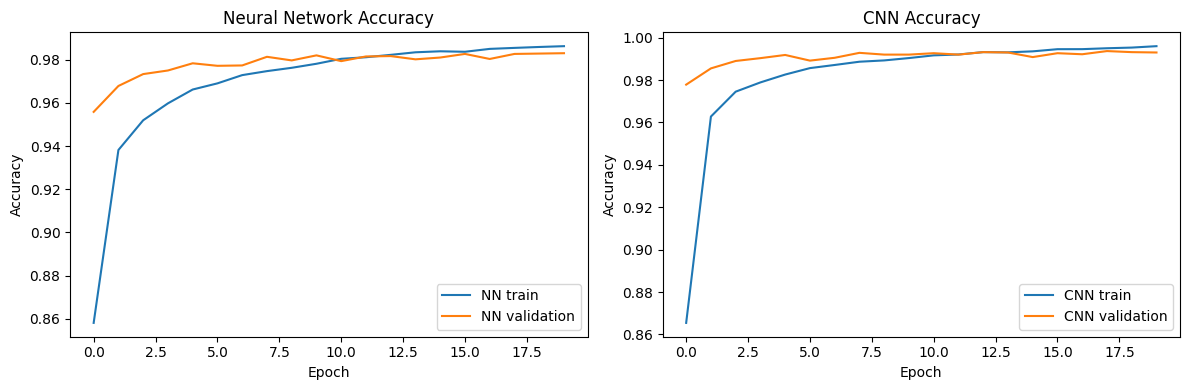

In [11]:

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(nn_history.history['accuracy'], label='NN train')
plt.plot(nn_history.history['val_accuracy'], label='NN validation')
plt.title('Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(cnn_history.history['accuracy'], label='CNN train')
plt.plot(cnn_history.history['val_accuracy'], label='CNN validation')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:

# Save the models
nn_model.save('nn_model.h5')
cnn_model.save('cnn_model.h5')

print("Models saved successfully.")

Models saved successfully.


# **Predictionson new Data**

In [57]:
from tensorflow.keras.models import load_model
# Load saved models
loaded_nn_model = load_model('nn_model.h5')
loaded_cnn_model = load_model('cnn_model.h5')

In [74]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os



# Function to load and preprocess images
def load_and_preprocess_images(base_directory):
    images = []
    true_labels = []
    for digit_folder in sorted(os.listdir(base_directory)):
        digit_path = os.path.join(base_directory, digit_folder)
        if os.path.isdir(digit_path):
            for filename in sorted(os.listdir(digit_path)):
                if filename.endswith((".png", ".jpg", ".jpeg")):
                    img_path = os.path.join(digit_path, filename)
                    img = load_img(img_path, color_mode="grayscale", target_size=(28, 28))
                    img_array = img_to_array(img)
                    img_array = img_array.astype('float32') / 255.0
                    img_array = img_array.reshape((28, 28, 1))

                    images.append(img_array)
                    true_labels.append(int(digit_folder))

    return np.array(images), np.array(true_labels)

In [75]:
def predict_and_display(model, images, true_labels):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate the number of rows and columns for subplots
    num_images = len(images)
    num_cols = 10  # You can adjust this value
    num_rows = (num_images + num_cols - 1) // num_cols # Calculate rows to fit all images

    plt.figure(figsize=(20, 2 * num_rows)) # Adjust figure height based on rows
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i+1) # Use calculated rows and cols
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        color = 'yellow' if predicted_labels[i] == true_labels[i] else 'red'
        plt.title(f"P:{predicted_labels[i]}, T:{true_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [76]:

# Load images from local directory
image_directory = "/content/numbers"  # Replace with your actual directory path
new_images, true_labels = load_and_preprocess_images(image_directory)

Neural Network predictions:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


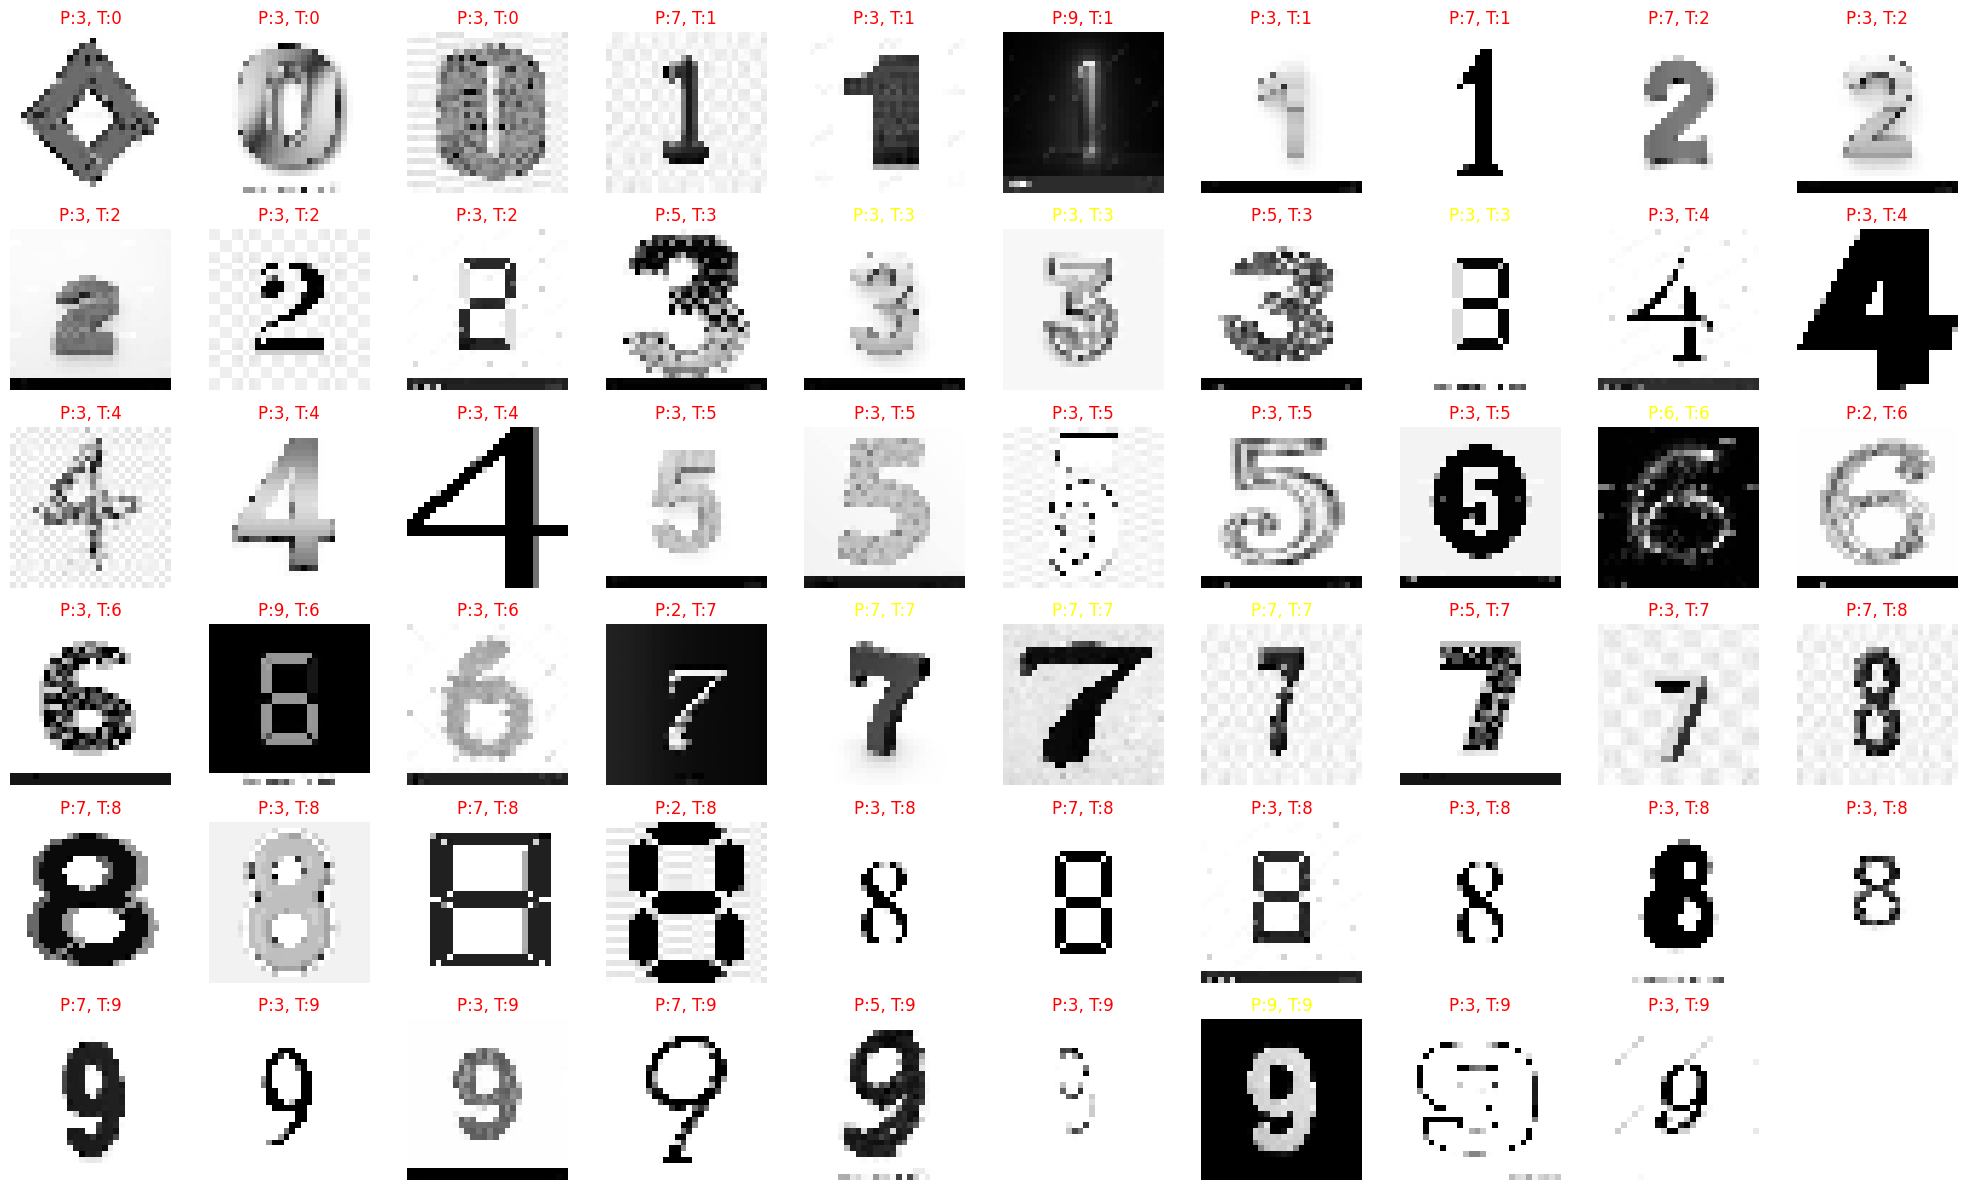

CNN predictions:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


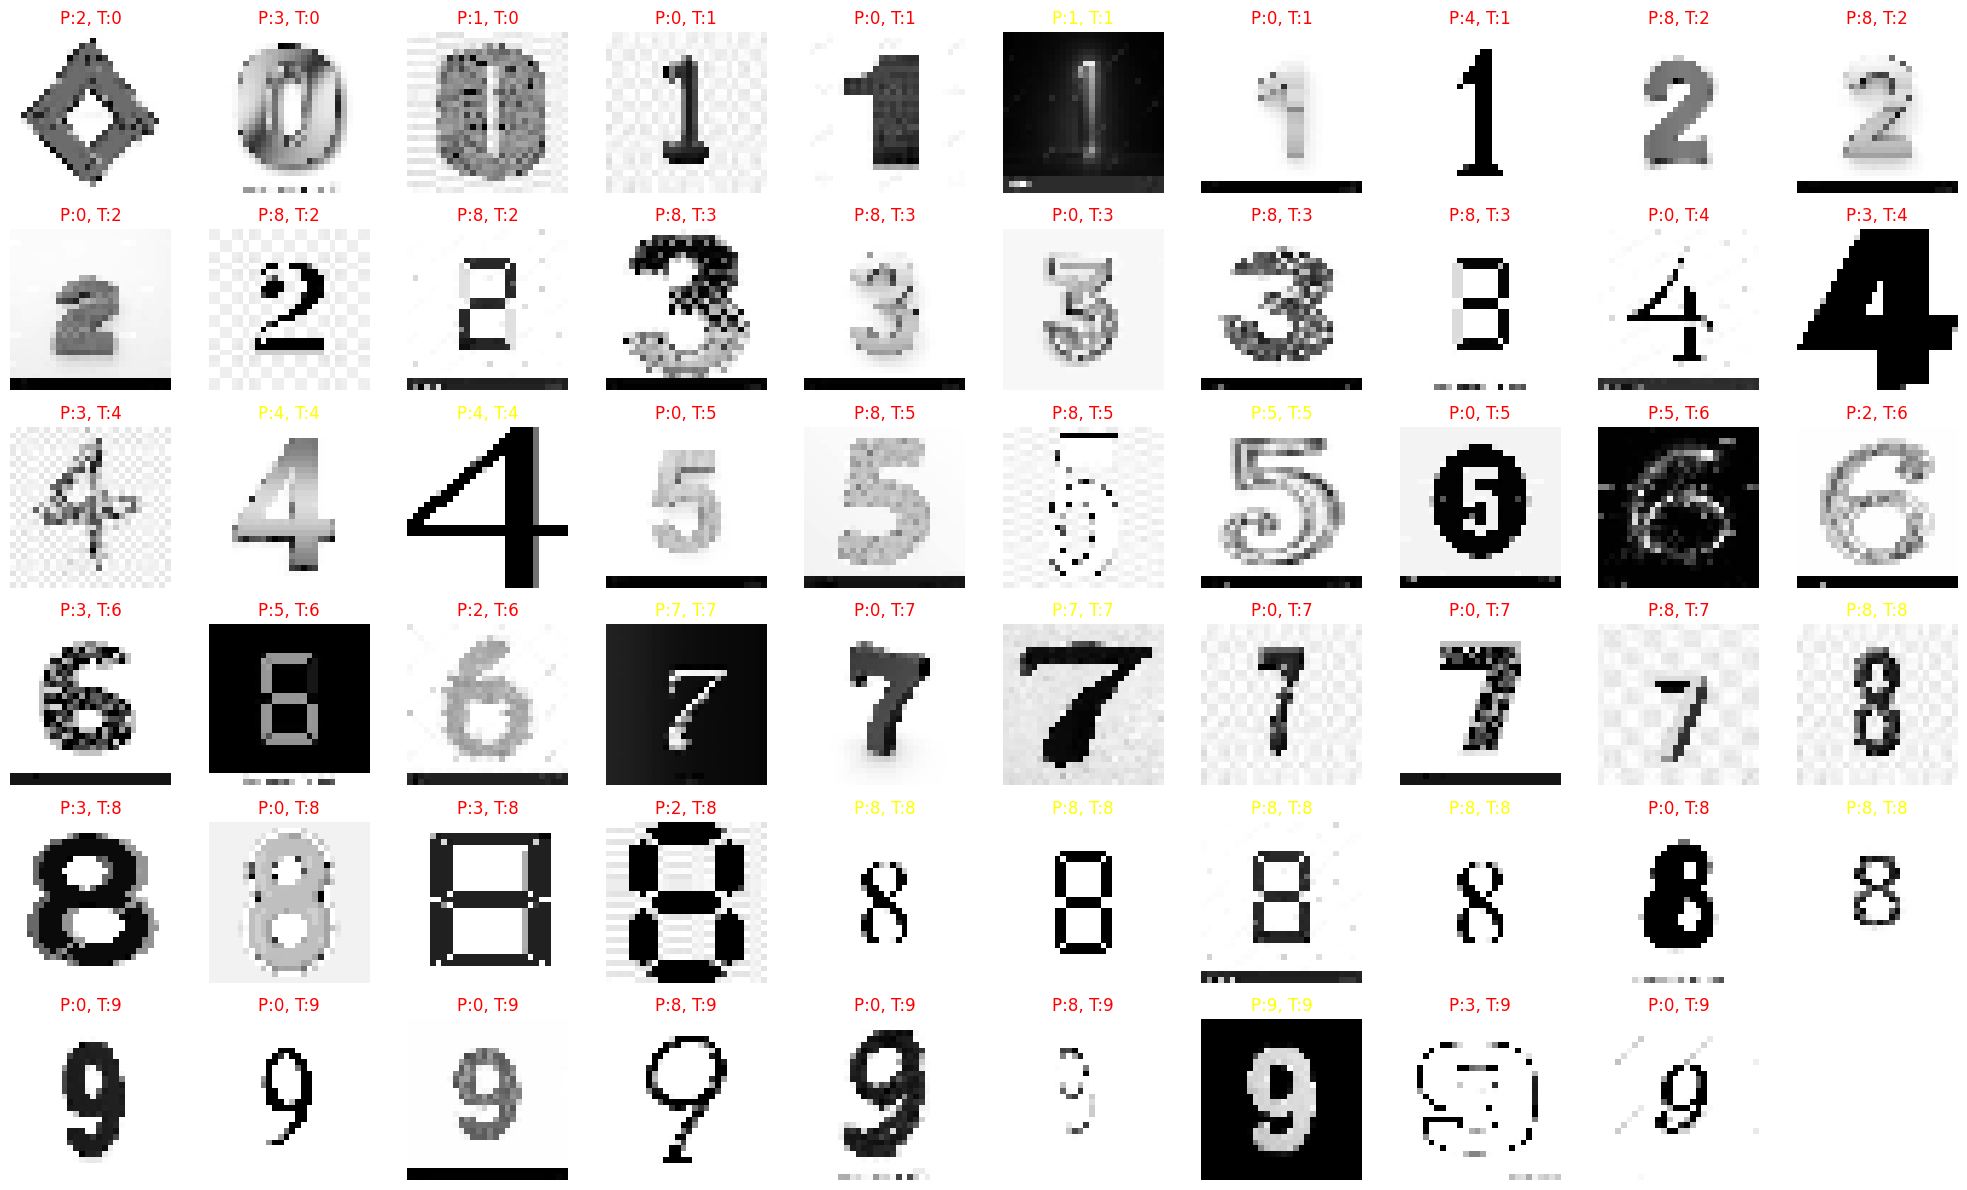

In [77]:

print("Neural Network predictions:")
predict_and_display(loaded_nn_model, new_images, true_labels)

print("CNN predictions:")
predict_and_display(loaded_cnn_model, new_images, true_labels)

In [78]:

# Print classification report
from sklearn.metrics import classification_report

def print_classification_report(model, images, true_labels):
    predictions = model.predict(images)
    pred_labels = np.argmax(predictions, axis=1)
    print(classification_report(true_labels, pred_labels))

In [79]:

print("\nNeural Network Classification Report:")
print_classification_report(loaded_nn_model, new_images, true_labels)

print("\nCNN Classification Report:")
print_classification_report(loaded_cnn_model, new_images, true_labels)


Neural Network Classification Report:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.08      0.60      0.15         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       1.00      0.20      0.33         5
           7       0.25      0.50      0.33         6
           8       0.00      0.00      0.00        11
           9       0.33      0.11      0.17         9

    accuracy                           0.14        59
   macro avg       0.17      0.14      0.10        59
weighted avg       0.17      0.14      0.10        59


CNN Classification Report:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m